In [2]:
# Import mecessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Import the data
df = pd.read_csv('Adidas_Sales.csv')

In [4]:
# Check for nulls
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Check data types
df.dtypes

Retailer            object
Retailer ID          int64
Invoice Date        object
Region              object
State               object
City                object
Product             object
Price per Unit      object
Units Sold          object
Total Sales         object
Operating Profit    object
Operating Margin    object
Sales Method        object
dtype: object

In [7]:
# Correct dtypes

# Price Per unit
df['Price per Unit'] = df['Price per Unit'].str.replace('$', '').astype('float64')
df['Units Sold'] = df['Units Sold'].str.replace(',', '').astype('int64')
df['Total Sales'] = df['Total Sales'].replace('[\$,]', '', regex=True).astype('float64')
df['Operating Profit'] = df['Operating Profit'].replace('[\$,]', '', regex = True).astype('float64')
df['Retailer ID'] = df['Retailer ID'].astype('object')

In [8]:
# Drop Operating Margin Column
df.drop('Operating Margin', axis = 1, inplace =  True)

In [9]:
# Display the first 3 rows
df.head(3)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,In-store


In [10]:
# Convert Invoice Date to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Create a month column
df['Month'] = df['Invoice Date'].dt.month

In [11]:
# Convert month column into a character
df['Month'] = df['Month'].astype('object')

## Visualization

### 1. Line chart

#### Matplotlib

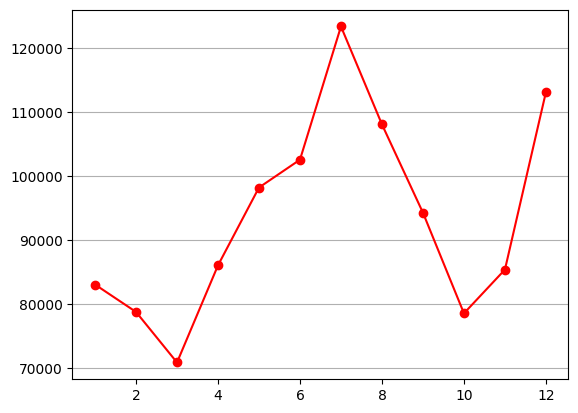

In [12]:
# Find monthly mean Sales
monthly_sales = df.groupby('Month').mean(numeric_only = True)['Total Sales']

# Set x and y values
x = monthly_sales.index
y = monthly_sales.values

# Plot
plt.plot(x, y, color = 'red', marker = 'o')

# Customize
plt.grid(axis = 'y')

# Display
plt.show()

#### Seaborn

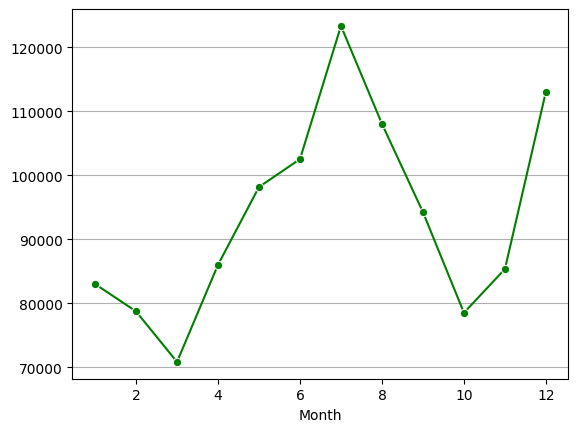

In [13]:
# Find monthly mean Sales
monthly_sales = df.groupby('Month').mean(numeric_only = True)['Total Sales']

# Convert monthlt_sales into a df
monthly_sales_df = monthly_sales.reset_index()

# Plot
sns.lineplot(data = monthly_sales_df, x = monthly_sales.index, y = monthly_sales.values,color = 'green', marker = 'o')

# Customize
plt.grid(axis = 'y')

# Display
plt.show()

### 2. Bar Graphs

#### matplotlib

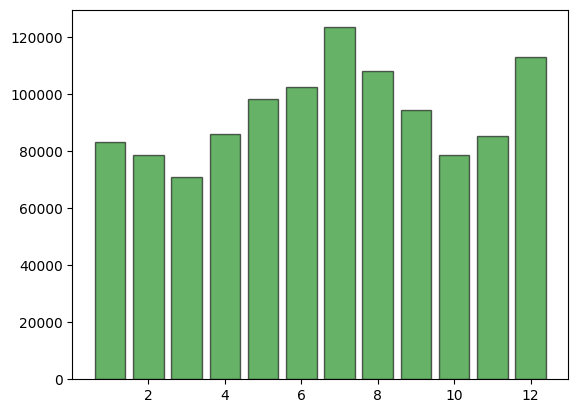

In [14]:
plt.bar(x, y, color = 'green', alpha = 0.6, edgecolor = 'black')
plt.show()

#### Seaborn

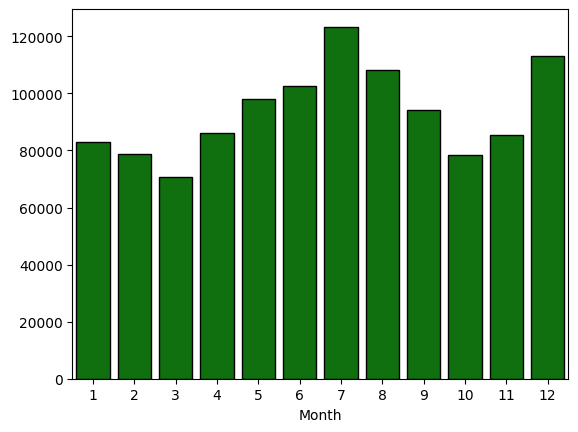

In [15]:
# Convert monthly_sales into a df
monthly_sales_df = monthly_sales.reset_index()

# Use seaborn
sns.barplot(data = monthly_sales_df, x = monthly_sales.index, y = monthly_sales.values, color = 'green', edgecolor = 'black')
plt.show()

### 3. Horizontal Bars

#### Matplotlib

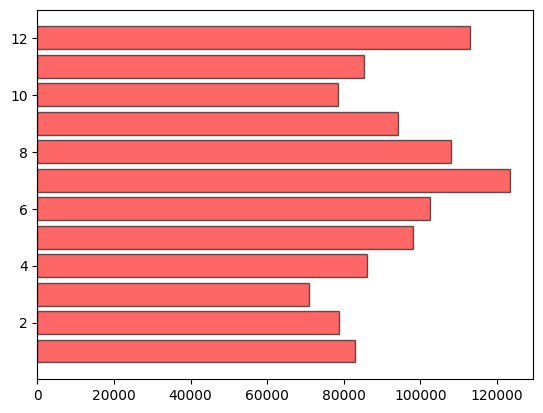

In [16]:
plt.barh(x, y, color = 'red', alpha = 0.6, edgecolor = 'black')
plt.show()

#### Seaborn

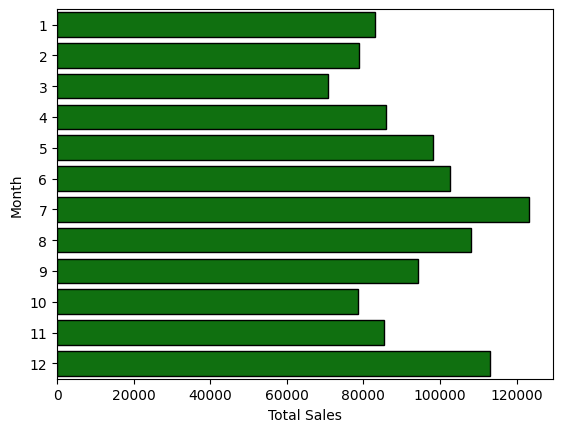

In [17]:
# Use seaborn
sns.barplot(data = monthly_sales_df, y = 'Month', x = 'Total Sales', color = 'green', orient = 'h', edgecolor = 'black') # Orient forces the bars to be horizantal
plt.show()

### Pie Chart

In [18]:
# NB: Seaborn does not have built in function for count plots

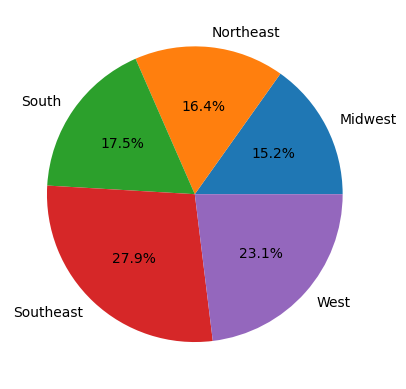

In [19]:
region_sales = df.groupby('Region').mean(numeric_only = True)['Total Sales']
m = region_sales.index
n = region_sales.values

# Plot
plt.pie(n, labels = m, autopct = '%1.1f%%')
plt.show()

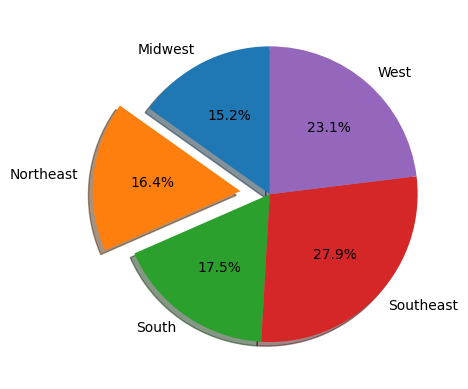

In [20]:
region_sales = df.groupby('Region').mean(numeric_only = True)['Total Sales']
m = region_sales.index
n = region_sales.values

# Plot
plt.pie(n, labels = m, autopct = '%1.1f%%', startangle = 90, explode = [0, 0.2,0,0,0], shadow = True) # Apply explode
plt.show()

### Box Plot

#### Matplotlib

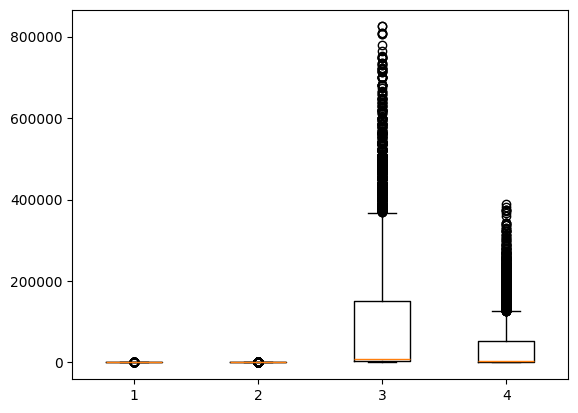

In [21]:
# Ensuring passing of numeric types only
numeric_df = df.select_dtypes(include = np.number)

plt.boxplot(numeric_df)
plt.show()

#### Seaborn

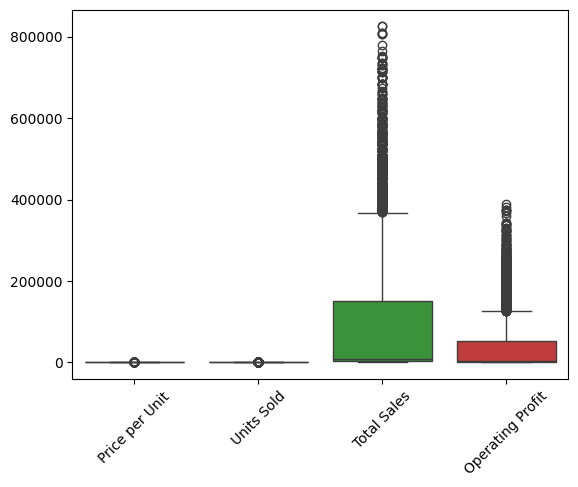

In [22]:
sns.boxplot(numeric_df)
plt.xticks(rotation = 45)
plt.show()

### Scatter Plot

#### Matplotlib

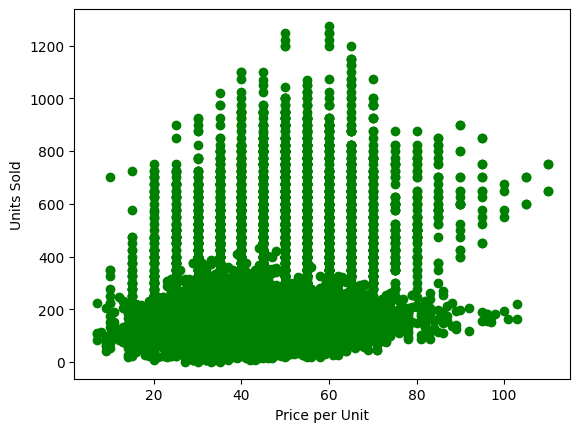

In [23]:
plt.scatter(df['Price per Unit'], df['Units Sold'], color = 'green')

# Add Labels
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')

# Display the plot
plt.show()

#### Seaborn

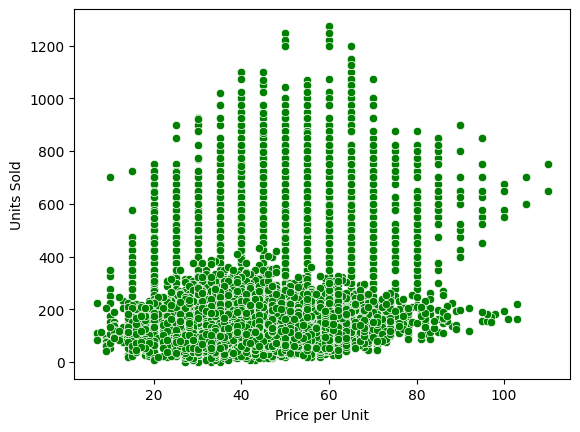

In [24]:
sns.scatterplot(data = df, x = 'Price per Unit', y = 'Units Sold', color = 'green')
plt.show()

### Histograms

#### Matplotlib

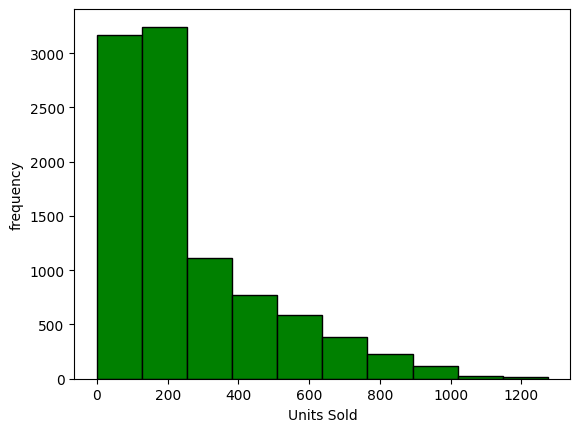

In [25]:
plt.hist(df['Units Sold'], color = 'green', edgecolor = 'black') # You can add bins if need be
plt.xlabel('Units Sold')
plt.ylabel('frequency')
plt.show()

#### Seaborn

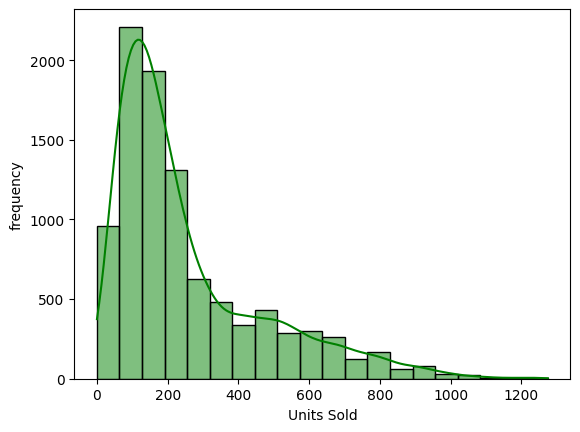

In [26]:
sns.histplot(df['Units Sold'], color = 'green', edgecolor = 'black',bins = 20, kde = True) # You can add bins if need be
plt.xlabel('Units Sold')
plt.ylabel('frequency')
plt.show()

### Count Plot

#### Matplotlib

In [27]:
### NB: Matplotlib does not have a built in function for count plot but can do manually

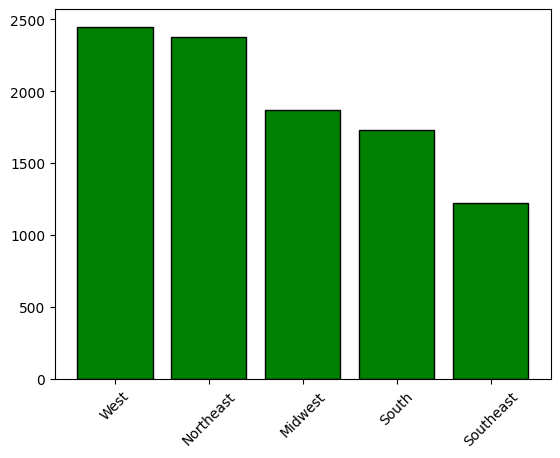

In [28]:
# Count each product
region_count = df['Region'].value_counts()

# Use bar
plt.bar(region_count.index, region_count.values, color = 'green', edgecolor = 'black')

# Customize
plt.xticks(rotation = 45)

# Show()
plt.show()

#### Seaborn

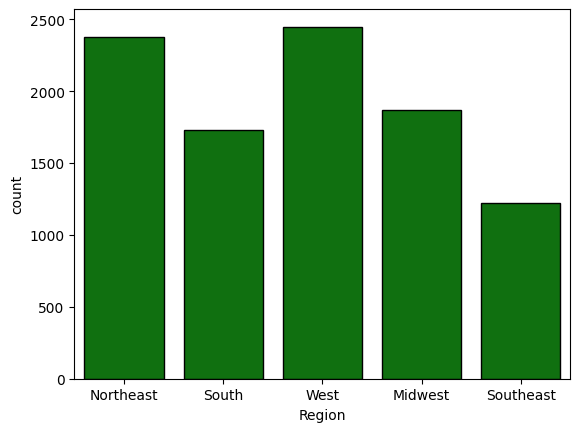

In [29]:
sns.countplot(data = df, x = 'Region', color = 'green', edgecolor = 'black')

# Show
plt.show()

### Heat Maps

#### Matplotlib

In [30]:
# NB: Does not have an inbuilt heat maps function

#### Seaborn

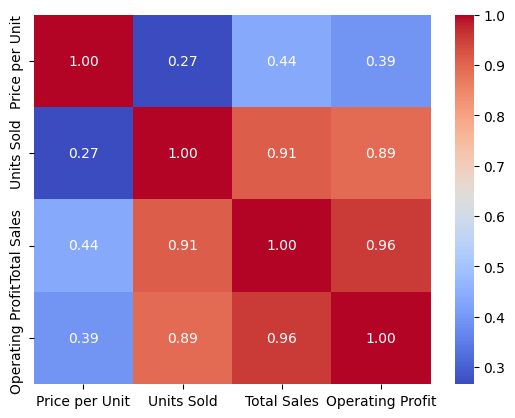

In [31]:
# Take only numeric columns
numeric_df = df.select_dtypes(include = np.number)
corr_matrix = numeric_df.corr()

# Plot the heat map

sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, fmt = ".2f")
            
# Show
plt.show()

### Subplots

#### Matplotlib

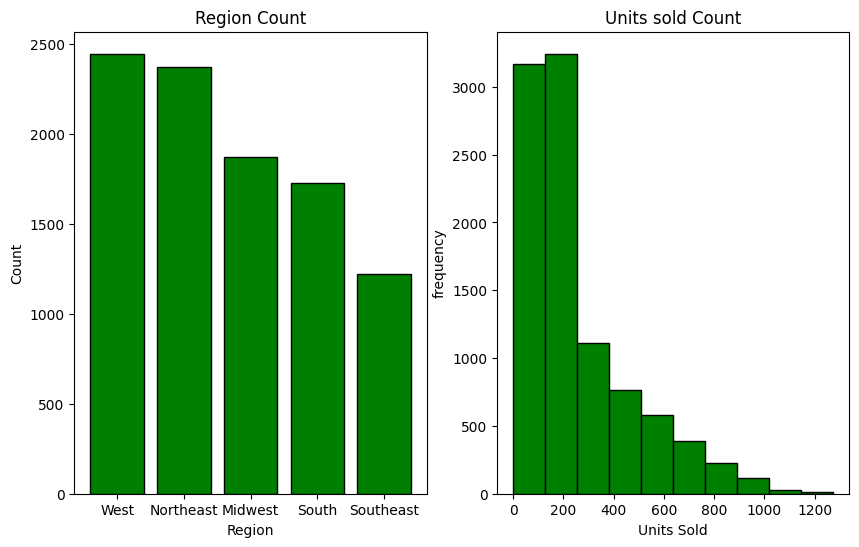

In [39]:
# Create subplots
fig, ax = plt.subplots(1,2, figsize = (10,6))

# plot the first bar chart
ax[0].bar(region_count.index, region_count.values, color = 'green', edgecolor = 'black')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Count')
ax[0].set_title('Region Count')

#Plot the second bar chart
ax[1].hist(df['Units Sold'], color = 'green', edgecolor = 'black') # You can add bins if need be
ax[1].set_xlabel('Units Sold')
ax[1].set_ylabel('frequency')
ax[1].set_title('Units sold Count')

# Show plot
plt.show()

#### Seaborn

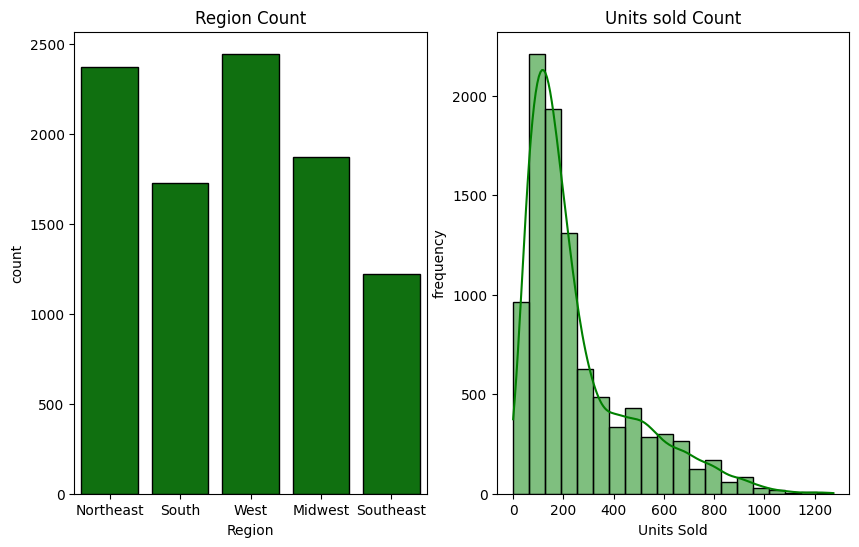

In [45]:
# Create subplots
fig, ax = plt.subplots(1,2, figsize = (10,6))

# Plot the first bar chart
sns.countplot(data = df, x = 'Region', ax = ax[0], color = 'green', edgecolor = 'black')
ax[0].set_title('Region Count')

# Plot the second subplot
sns.histplot(df['Units Sold'], ax = ax[1], color = 'green', edgecolor = 'black',bins = 20, kde = True) # You can add bins if need be
ax[1].set_xlabel('Units Sold')
ax[1].set_ylabel('frequency')
ax[1].set_title('Units sold Count')

# Show
plt.show()

## Pair Plot

In [46]:
# NB: Matplotlib does not have an inbuilt pair plot function

#### Seaborn

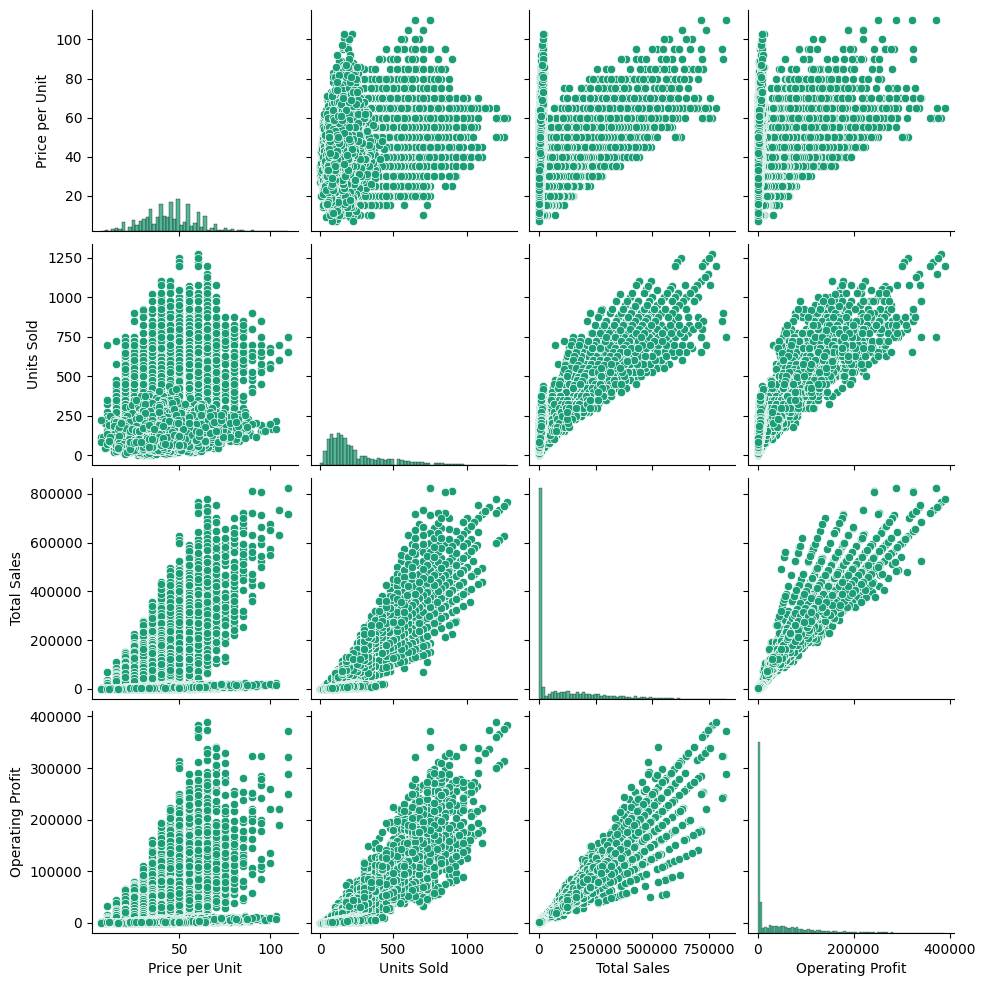

In [55]:
# set color
sns.set_palette('Dark2')

# Create pair plot
sns.pairplot(numeric_df)

# Show plot
plt.show()